# A7: Positron emission tomography

## Assignment
1. Measurement with a single positron source 
    1. **Task 1** The instructor will place a stronger $^{22}$Na source into the skull model. Measure the angular distribution of coincidence rate in the range of angles $\phi$ and $\psi$ needed to find the position of the source. Accumulation time 20 s.
    2. **Task 2** Measure coincidence rates for angles $\phi$ = 60$\degree$, 90$\degree$ and 120$\degree$ or preferrably more without a lead slab and with the lead slab; accumulation time 100 s.
    3. Explain the form of the measured angular distribution of coincindence rates. Estimate positron source position using a graphical method - by drawing lines and finding their intersections.

2. Measurement with two positron sources
    1. **Task 3** After the instructor placed the second positron source into the skull model, measure the angular distribution of coincidence rate in the range of angles $\phi$ and $\psi$ needed to find the position of both sources. Accumulation time 20 s.
    2. Use a ruler to fund approximate position of both positron sources.


3. Take measurements of relevant geometrical parameters of the measurement setup.

4. When processing the measurements, estimate the positions of positron sources using the formulas given in the instruction below. Attach your graphical drawing to your lab report.

5. Compare the results of graphical and analytical estimates of the positions of the positron sources. 

## Positron emission tomography

In a simplified form, this lab assignment introduces a very effective medical imaging menthod used in mediacal diagnostics as well as in medical research in neurology, oncology, cardiology and other areas of medicine.

The method localizes the origin of gamma photons arising as a result of annihilation of positrons introduced into the body by administration of a radioactive substance with electrons of atoms in the tissue. The configuration of the photon detection system enables 3D reconstruction of the distribution of the radioactive agent in the body. Thus PET provides images of tissues depending on their ability to uptake the radioactive agent rather than anatomical structures. 

The detectors are arranged on a ring enveloping the patient and detecti the outcoming annihilation photons. The detectors are fitted with a coincidence electronics so that only photons arriving at the detector from opposite directions at apprxoimately the same time are counted. Each pair of photons can then be used to construct a line through the body. Using a large number of such lines one can re-construct the distribution of positron sources in the volume of the body.

| **Isotope**   | $^{11}C$ | $^{13}N$ | $^{15}O$ | $^{18}F$ | 
| ------------- | -------- | -------- | -------- | -------- | 
| **Half-life** | 20 min   | 10 min   | 2 min    | 110 min  | 

The most frequent radionuclides for PET are incorporated into common metabolites such as glucose or water and administered to the patient. It is also possible to incorporate radionuclides into more complex molecules, such as drugs, and use PET to follow the path of the drug in the body (drug tracking).

## Positron annihilation

The positron is an antiparticle of the electron. It is not usually encountered in the observable nature since it quickly annihilates with an electron, which is one of the building stones of matter around us. During annihilation, both particles disappear and two annihilation photons arise. The positrons are emitted in $\beta^+$ decays of some radioisotopes. These positrons first dissipate their kinetic energy by scattering, predominantly on electrons in the surrounding matter. When their kinetic energy is close to zero, they annihilate with nearby electrons. It usually takes $10^{-7} - 10^{-10}$ s for an emitted positron to annihilate, and during that time it travels at most several tenths of millimeter. For example, $^{22}$Na emits positrons with energy at most 0.8 MeV and a positron with this energy can travel in water no further than 1 millimeter. Predominantly, two photoms arise in electron-positron annihilation. Provided that both the positron and electron have kinetic energy close to 0, the energy of annihilation pohotons is equal to the sum of rest masses of the positron and electron. Momentum conservation requires that the common momentum of photoms is practically zero, and so they must have equal but opposite momenta of 512 keV. The mean free path of such photoms in the tissue is several centimeters, and 7.2 cm in water. 

## Coincidence measurement
Concurrent physical phenomena can be studied by coincidence measurement. It is based on an electronic, coincidence block, that outputs a signal only if simultaneous impoulses arrive on inputs [3]. Coincidence of physical phenomena is blurred due to fluctuations of signal formation in detectors and time resolution of the coincidence electronics. The time resolution for coincidence measurement of two or more concurrent phenomena depemds primarily on the rate of signal formation in the detectors and reaches 10$^{-6}$ to 10$^{-12}$ s with up-to-date electronics. We call the coincidences arising from detection of both photons from an individual annihilation *true coincidences*. If two positrons annihilate by chance within the coincidence time window, we can detect a coincidence arising from annihhlations of two different positrons. Such coincidences are called *spurious*. The spurious coincidence rate $N_s$ can be calculated using the (uncorrelated) signal rates on two detectors, $N_1$ and $N_2$, and the width of the coincidence time window $\tau$:
$$
N_s = 2N_1N_2\tau
$$
or, for several detectors,
$$
N_s = 2^{n-1}N_1N_2\dots N_n\tau^{n-1}
$$

## Experiment setup
**Fig. 1** shows experiment setup and quantities used in the description of the experiment. Positron emitting $^22$Na sources are placed in a skull-shaped plastic holder. The skull is placed on a rotating stage on a table. To measure the vertical rotation with respect to the table, the skull is fitted with a protractor scale for a full 360$\degree$ range and a fixed arrow mark on the table. Two Na(TI) scintillation detectors A and B are used to detect annihilation photoms. The detectors are cylindrical, with 5 cm diameter and 5 cm height, and are placed about 15 cm from the rotation axis of the skull. Detector A is fixed to the table while detector B is mounted on a swivel arm allowing rotation around the skull axis. The position of detector B with respect to the table can be measured using a protractor scale on the table and a pointer on the swivel arm. 

The detectors have finite dimensions and finite angular resolution - they can detect photons arriving at an angle to the detector axis. The width of the acceptance angle range is call *angular resolution* and limits the precision of photon direction measurement.Signals from both detectors are - after amplification and discrimination - fed to a coincidence block and further to a coincidence counter. 

**Fig. 1** Posittron tomography
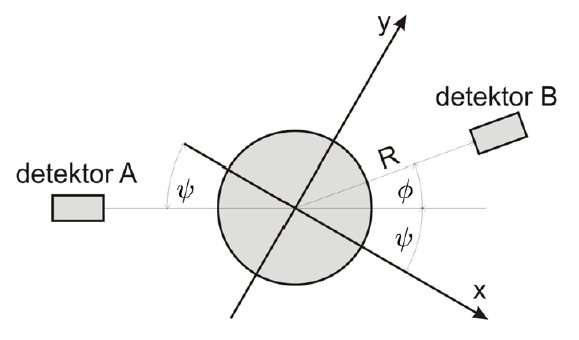


## Data analysis

**Coordinate systems**

**Fig. 1** shows the two coordinate systems in our experiment. The first is a polar coordinate system connected with the table, with origin coincident with the common vertical rotation axis of the skull and the swivel arm of detector B. In this system, the coordinates of detector A are (R, 180$\degree$) and coordinates of detector B are (R, $\phi$). The second system is cartesian and is connected with the skull model, its origin coincident with the rotation axis. We have to determine the position of the two positron sources with respect to this system. The coordinates of detectors A and B in the cartesian system of the model rotated by $\psi$ with respect to the table are
$$
\begin{align}
 x_A = - R \cos{\psi} \quad & \quad x_B = R \cos{(\psi + \phi)} \\
 y_A = - R \sin{\psi} \quad & \quad  y_B = R \sin{(\psi + \phi)} 
\end{align}
$$
In the skull system, the equation of the line connecting detectors A and B is
$$
(y_B - y_A)x - (x_B - x_A)y = (y_B - y_A)x_A - (x_B - x_A)y_A.
$$

## Finding the positions of positron sources

For the following explanation, we assume that annihilation photons arise from a point source in opposite directions. Then we observe true coincidences when the source lies on the line connecting detectors A and B.

**One positron source**

Rotate the model skull to $\psi_1 = 0\degree$ and measure coincidence rates in a sufficient range of angles $\phi$. The distribution will peak at a certain angle $\phi_1$. Then, we rotate the skull to $\psi_2 = 90\degree$ and again measure coincidence rates in a sufficient range of angles $\phi$. The distribution will peak at $\phi_2$. For ($\psi_1, \phi_1$) and ($\psi_2, \phi_2$) we get equations of two lines, 
$$
\begin{align}
a_{11}x + a_{12}y = b_1 \\
a_{21}x + a_{22}y = b_2.
\end{align}
$$
We can find the solution $(x,y$ by solving the system using, for example, the Cramer's rule. This solution is an estimate of the source position with respect to the skull.

**Multiple positron sources**

In the case of N positron sources, we will observe N (possibly overlapping) peaks in the angular distributions for each angle $\psi$. To distinguish peaks from individual sources, we need N angular distributions for angles $\psi_1, \psi_2, \dots \psi_N$. The problem is that we now have N lines between detectors A and B, and there are $N(N-1)/2$ crossings, of which we need to identify the N crossings that correspond to positions of sources. Those crossings will be N-fold crossings, but we may not be able to identify them due to measurement error. There are several methods to solve this problem:
1. Some lines may cross outside of the skull and such crossings may be safely ignored.
2. If the sources have different activities, we may be able to identify peaks in angular distributions belonging to individual sources.
3. In this notebook, we will use confidence regions for corssings to identify those that are congruent within measurement error. 


## About this notebook

This notebook contains Python code that allows to analyze data provided in a suitable format. The analysis can be easily modified or extended or modified. The code will most of the time cope with various measurement plans, but you may have to intervene if something goes wrong, such as failing fits etc. 

The plots and tables provided by the notebook will help you, but you will have to draw final conclusions about the results. 

Outputs of the analysis are tables and plots that can be copied and pasted into your lab report, or you can provide the notebook with data in place of a lab report. 

**Dependencies**

You may have to install some of the modules required by the notebook code to run. 

- Basic Python modules: `itertools` (no need to install)
- Python data processing tools: `numpy`, `scipy`, `matplotlib`, `pandas`, `seaborn`
- MC propagation of uncertainties:`mcerp` [more information](https://pythonhosted.org/mcerp/advanced_example.html)
- Miscellaneous:
    - `jinja2` (for Pandas dataframe formatting)

If any modules are missing, install them manually with `pip install <module_name>` or `conda install <module_name>`.

In a Linux environment (or cloud) uncomment and run the following cell:

In [5]:
# !pip install numpy scipy matplotlib jinja2 pandas seaborn mcerp

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

**Skull data**

Prepare data for an image of the skull that we will use to show our results.

In [7]:
# TODO this needs fixing!
A7_home = "."
data_dir = A7_home + "/sample_data/set_A"

# Read skull data from file for future use
def make_skull():
    data_x = []
    data_y = []
    with open(A7_home + "/skull_x_y.txt", "r") as infile:
        for line in infile:
            x, y = [float(s) for s in line.split()]
            data_x.append(x)
            data_y.append(y)
    skull_data = pd.DataFrame({"x": data_x, "y": data_y})
    return skull_data

skull_data = make_skull()

**Input data format**

For processing in this notebook, data for each task are expected in a simple tab-delimited text format as follows>
```
psi	phi	 N
0	-35	 5
0	-31	 9
...
90	-31	 5
90	-27	 3
...
120	-14	 5
120	-18	 7
... 
```

## Task 1

**Measurement with a single positron source**

1. The instructor will place a stronger $^{22}$Na source into the skull model.Measure the angular distribution of coincidence rate in the range of angles $\phi$ and $\psi$
needed to find the position of the source. Accumulation time 20 s.
2. Measure coincidence rates for angles $\phi$ = 60, 90 and 120$\degree$ or preferrably more without a lead slab and with the lead slab placed between detectors; accumulation time 100 s. In this notebook, this is denoted as *Task 2*, see below.
3. Explain the form of the measured angular distribution of coincindence rates. Estimate positron source position using a graphical method - by drawing lines and finding their intersections.


The data expected for the first task are dependencies of coincidence rates on the angle between detectors $\phi$ for several values of skull rotation $\psi$. Here we read the data from a data file, but it is easy to read data also from a string entered in a cell in this notebook.

In [8]:
data_1 = pd.read_table(data_dir + "/Task1.txt", sep = "\t")
data_1["err"] = np.sqrt(data_1["N"])
print(data_1.head())

   psi  phi   N       err
0    0  -35   5  2.236068
1    0  -31   9  3.000000
2    0  -27   6  2.449490
3    0  -23   6  2.449490
4    0  -19  30  5.477226


### Fit data

We fit datasets measured for each value of $\psi$ to a gaussian:
$$
f(\phi) = bg + amp \exp\left[-{1\over2}\left({\phi-mean}\over{width}\right)^2\right]
$$
We fit the data, print a table of results and do some plots so that we can assess the fit quality. 

In [9]:
from scipy.optimize import curve_fit

def gauss_plus_background(x, bg, amp, mean, w):
    """
    Function returning a gaussian with flat background, 
    Meaning of parameters is clear from the definition.
    """
    return bg + amp * np.exp(- 1/2 * ((x-mean)/w)**2)

psi_vals = data_1["psi"].unique() # how many psi values were used
fits = dict.fromkeys(psi_vals)
for psi in psi_vals:
    data_psi = data_1[data_1["psi"] == psi]
    p_opt, p_cov = curve_fit(gauss_plus_background, data_psi["phi"].values, data_psi["N"].values, p0 = [0, max(data_psi["N"]), 0, 20], 
                                   sigma = data_psi["err"].values, absolute_sigma = True)
    p_err = np.sqrt(np.diag(p_cov))
    errXerr = np.outer(p_err, p_err)
    p_corr = p_cov / errXerr
    fits[psi] = {"parameters": p_opt, "par_errors": p_err, "correlations" : p_corr}

fits_table = pd.DataFrame({
    "$\\psi$ ($\\degree$)" : psi_vals,
    "bg" : [fits[psi]["parameters"][0] for psi in psi_vals],
    "$s_{bg}$" : [fits[psi]["par_errors"][0] for psi in psi_vals],
    "amp" : [fits[psi]["parameters"][1] for psi in psi_vals],
    "$s_{amp}$" : [fits[psi]["par_errors"][1] for psi in psi_vals],
    "mean ($\\degree$)" : [fits[psi]["parameters"][2] for psi in psi_vals],
    "$s_{mean}$ ($\\degree$)" : [fits[psi]["par_errors"][2] for psi in psi_vals],
    "width ($\\degree$)" : [fits[psi]["parameters"][3] for psi in psi_vals],
    "$s_{width}$ ($\\degree$)" : [fits[psi]["par_errors"][3] for psi in psi_vals]
})
fits_table.style.format(precision = 2).set_caption("Parameters of Gaussian fits to $\\phi$ profiles of coincidence rates")

,$\psi$ ($\degree$),bg,$s_{bg}$,amp,$s_{amp}$,mean ($\degree$),$s_{mean}$ ($\degree$),width ($\degree$),$s_{width}$ ($\degree$)
0,0,3.23,1.26,143.08,5.61,-8.15,0.22,6.01,0.23
1,90,2.88,1.30,162.64,5.64,-6.46,0.21,6.80,0.22


In [10]:
def add_fitted_to_data(data):
    '''
    Adds fitted values and residuals to data points.
    Also adds chi2 and df to the fits dictionary.
    '''
    result = data.copy()
    psi = np.mean(result["psi"])
    parameters = fits[psi]["parameters"]
    result["N_fit"] = gauss_plus_background(data["phi"], *parameters)
    result["residual"] = (result["N"] - result["N_fit"]) / np.sqrt(result["N_fit"])
    fits[psi]["chisq"] = sum(r**2 for r in result["residual"]) # Side effect!
    nrow, ncol = data.shape
    fits[psi]["df"] = nrow - 4
    return result

data_1 = data_1.groupby("psi")[["psi", "phi", "N", "err"]].apply(add_fitted_to_data)
data_1.index = data_1.index.droplevel("psi")
print(data_1.head())

   psi  phi   N       err      N_fit  residual
0    0  -35   5  2.236068   3.240313  0.977557
1    0  -31   9  3.000000   3.338458  3.098573
2    0  -27   6  2.449490   4.285834  0.828010
3    0  -23   6  2.449490  10.017565 -1.269351
4    0  -19  30  5.477226  31.334610 -0.238420


Text(0.5, 1.0, 'Gaussian fits to angular profiles of coincidence rates')

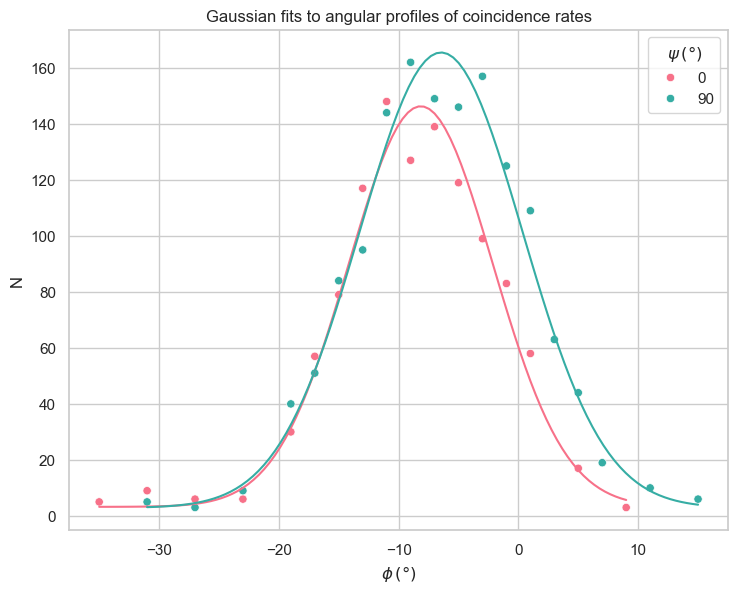

In [11]:
def make_fine_plot(data):
    '''
    Data to draw a fitted function plot
    '''
    psi = np.mean(data["psi"])
    parameters = fits[psi]["parameters"]
    x = np.linspace(min(data["phi"]), max(data["phi"]), 100)
    y = gauss_plus_background(x, *parameters)
    return pd.DataFrame({"psi": np.repeat(psi, 100), "phi": x, "N_fit": y})

fine_data = data_1.groupby("psi")[["psi", "phi", "N_fit"]].apply(make_fine_plot)

sns.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize=(8.5, 6.5))
sns.scatterplot(data = data_1, x = "phi", y = "N", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
sns.lineplot(data = fine_data, x = "phi", y = "N_fit", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax, legend = False)
plt.xlabel("$\\phi\\,(\\degree)$")
plt.legend(title = "$\\psi\\,(\\degree)$")
plt.title("Gaussian fits to angular profiles of coincidence rates")

### Diagnostic plots

We have a table of fits and plot of data and fit, but we also need to see if our fit was good. Therefore we add two more diagnostic plots - normalized residuals and QQ-plot.

Text(0.5, 1.0, 'Residuals of gaussian fits to angular profiles')

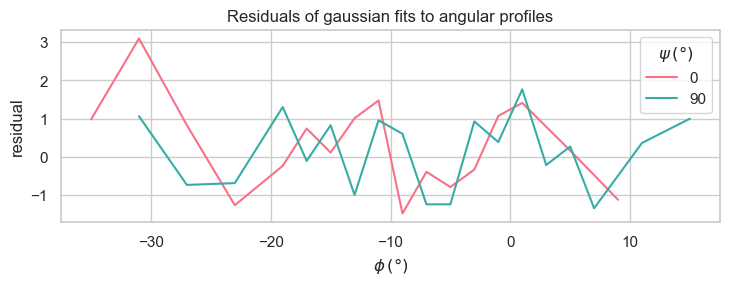

In [12]:
fig, ax = plt.subplots(figsize = [8.5, 2.5])
sns.lineplot(data = data_1, x = "phi", y = "residual", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), dashes = True, ax = ax)
plt.xlabel("$\\phi\\,(\\degree)$")
plt.legend(title = "$\\psi\\,(\\degree)$")
plt.title("Residuals of gaussian fits to angular profiles")

Text(0.5, 1.0, 'QQ plot for gaussian fits to angular profiles')

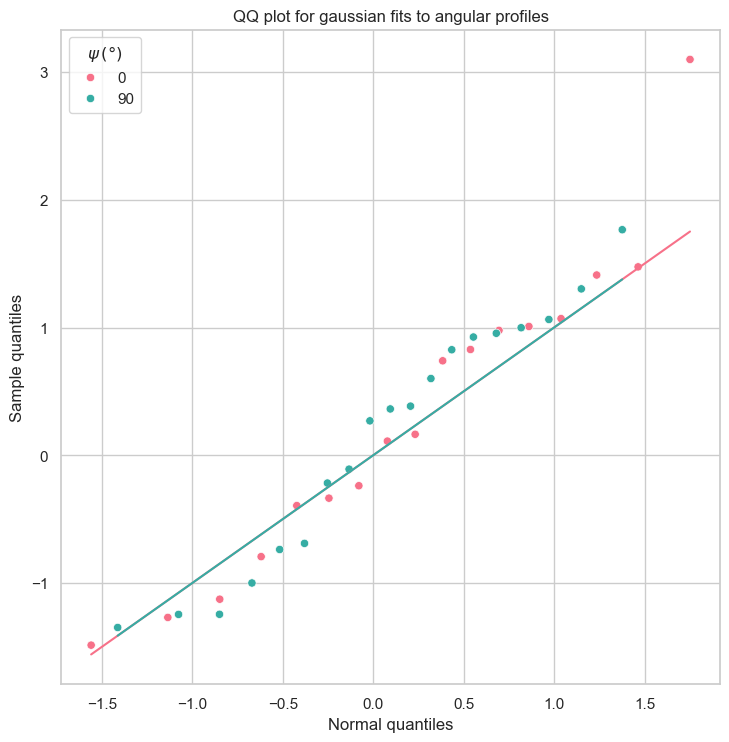

In [13]:
from scipy.stats import norm

def make_QQ_data(data):
    psi = np.mean(data["psi"]).astype(int)
    y = np.sort(data["residual"])
    mean, std = np.mean(y), np.std(y)
    ppf = norm(loc=mean, scale=std).ppf # Inverse CDF
    N = len(y)
    x = [ppf(i / (N+2)) for i in range(1,N+1)]
    nrow, ncol = data.shape
    return pd.DataFrame({"psi": np.repeat(psi, nrow), "x": x, "y": y})

qq_data = data_1.groupby("psi")[["psi", "residual"]].apply(make_QQ_data)
   
fig, ax = plt.subplots(figsize = [8.5, 8.5])
sns.scatterplot(data = qq_data, x = "x", y = "y", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
sns.lineplot(data = qq_data, x = "x", y = "x", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax, legend = False)

# Add labels
plt.xlabel('Normal quantiles')
plt.ylabel('Sample quantiles')
plt.legend(title = "$\\psi\\,(\\degree)$")
plt.title("QQ plot for gaussian fits to angular profiles")

### Calculate the position of the positron source

We start by converting fit parameters to (correlated) `mcerp` random variables. With these we then do all the calculations so that we keep track of uncertainties along the way. We construct lines and their crossings, and make tables and plots as a guide to what are the results and as a material to include in a lab report. 

In [14]:
from mcerp import *
import mcerp.umath as umath

R = Normal(15,0.5) # We are not sure about the correct value, but the uncertainty translates directly to uncertainties in estimated positions

def to_xy(R, psi, phi):
    """
    For given angle positions of the skull and the movable detector arm gives 
    xy positions of centers of detector A and detector B.
    """
    rad = 3.1415926 / 180.0
    return -R * umath.cos(psi * rad),\
        -R * umath.sin(psi * rad),\
        R * umath.cos(psi * rad + phi * rad),\
        R * umath.sin(psi * rad + phi * rad)

# Covnert fit parameters to random variables and set their correlations.
# This will help us propagate parameter uncertainties through calculations.

rv_fits = {} # contains line points as random variables
par_names = ["bg", "amp", "mean", "std"]
for psi, fit in fits.items():
    rv_list = []
    for par, err in zip(fit["parameters"], fit["par_errors"]):
        rv_list.append(Normal(par, err))
    correlate(rv_list, fit["correlations"])
    rv_fits[psi] = {par_names[i]: rv_list[i] for i in range(len(rv_list))}

In [15]:
points = {} # collecting random variables
points_records = [] # collecting for table

for psi, par in rv_fits.items():
    ax, ay, bx, by = to_xy(R, psi, par["mean"])
    points[psi] = {"A": (ax, ay), "B": (bx, by)}
    points_records.append({
        "$\\psi$ ($\\degree$)" : psi,
        "AB" : "A", 
        "x (cm)" : ax.mean, 
        "$s_x$ (cm)" : ax.std, 
        "y (cm)" : ay.mean, 
        "$s_y$ (cm)" : ay.std,
    })
    points_records.append({
        "$\\psi$ ($\\degree$)" : psi,
        "AB" : "B", 
        "x (cm)" : bx.mean, 
        "$s_x$ (cm)" : bx.std, 
        "y (cm)" : by.mean, 
        "$s_y$ (cm)" : by.std,
    })

points_table = pd.DataFrame.from_records(points_records)

points_table.style.format(precision=2).set_caption("Estimated positions of detectors A and B")


,$\psi$ ($\degree$),AB,x (cm),$s_x$ (cm),y (cm),$s_y$ (cm)
0,0,A,-15.00,0.50,0.00,0.00
1,0,B,14.85,0.49,-2.13,0.09
2,90,A,-0.00,0.00,-15.00,0.50
3,90,B,1.69,0.08,14.90,0.50


In [16]:
# X-points of pairs of lines: size-2 combinations of all psi measurements
from itertools import combinations

X_points = [] # for random variables
rows = [] # for a table
for psi1, psi2 in combinations(psi_vals, 2):
    ax1, ay1 = points[psi1]["A"]
    bx1, by1 = points[psi1]["B"]
    ax2, ay2 = points[psi2]["A"]
    bx2, by2 = points[psi2]["B"]
    a = by1 - ay1
    b = - bx1 + ax1
    c = a * ax1 + b * ay1
    d = by2 - ay2
    e = - bx2 + ax2
    f = d * ax2 + e * ay2
    Det = e * a - b * d
    x, y = (c * e - b * f)/Det, (a * f - c * d) / Det
    rows.append({
        "$\\psi_1$ ($\\degree$)": psi1, 
        "$\\psi_2$ ($\\degree$)": psi2, 
        "x (cm)": x.mean, "$s_x$ (cm)":x.std, "y (cm)": y.mean, "$s_y$ (cm)": y.std})
    X_points.append(((c * e - b * f)/Det, (a * f - c * d) / Det))

X_table = pd.DataFrame.from_records(rows)

X_table.style.format(precision = 2).set_caption("Estimated crossing of lines through detectors")

,$\psi_1$ ($\degree$),$\psi_2$ ($\degree$),x (cm),$s_x$ (cm),y (cm),$s_y$ (cm)
0,0,90,0.78,0.04,-1.12,0.05


The following function constructs a confidence ellipse for a pair of mcerp random variables x and y. 

In [17]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=1.0, facecolor='none', **kwargs):
    """
    Create a plot of the confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : mcerp random variables (scalar)
    ax : matplotlib.axes.Axes
        The Axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
  
    cov = correlation_matrix([x, y])
    pearson = cov[0, 1]
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = x.std * n_std
    mean_x = x.mean

    # calculating the standard deviation of y ...
    scale_y = y.std * n_std
    mean_y = y.mean

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

We can now draw the skull and plot the lines connecting detectors A and B and their crossing.

Text(0.5, 1.0, 'Lines through detectors A and B and their crossing point')

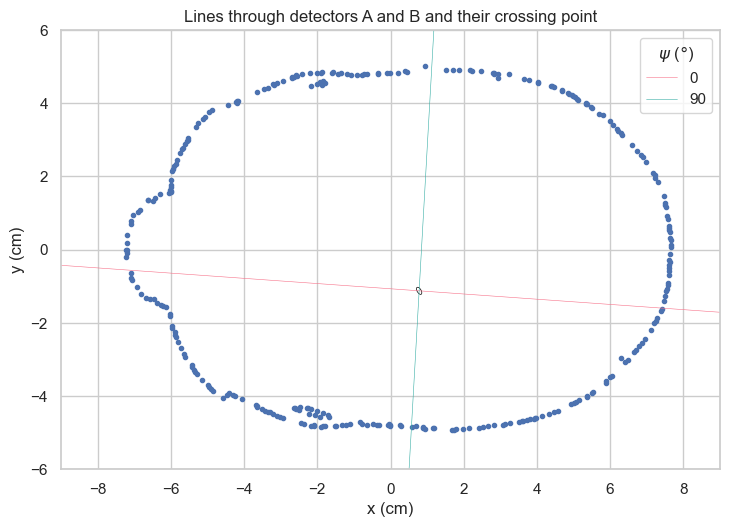

In [18]:
fig, ax = plt.subplots(figsize = [8.5, 8.5])
sns.lineplot(data = points_table, x = "x (cm)", y = "y (cm)", hue = "$\\psi$ ($\\degree$)", linewidth = 0.4,
             palette = sns.color_palette("husl", len(psi_vals)))
ax.scatter(skull_data["x"], skull_data["y"], marker = ".")
confidence_ellipse(X_points[0][0], X_points[0][1], ax, n_std = 2, 
                   edgecolor = "black", linewidth = 0.5)
ax.set_aspect("equal")
plt.xlabel("x (cm)")
plt.xlim([-9, 9])
plt.ylabel("y (cm)")
plt.ylim([-6,6])
plt.legend(title = "$\\psi$ ($\\degree$)")
plt.title("Lines through detectors A and B and their crossing point")

---
## Task 2

Measure coincidence rates for angles $\phi$ = 60, 90 and 120$\degree$ or more without a lead slab and with the lead slab inserted between detectors; accumulation time 100 s.

In [19]:
data_3 = pd.read_table(data_dir + "/Task2.txt", sep = "\t")
data_3["err"] = np.sqrt(data_3["N"])
print(data_3.head())

   psi   Pb  phi   N       err
0    0   no   60  16  4.000000
1    0   no   90   9  3.000000
2    0   no  120  30  5.477226
3    0  yes  120  15  3.872983


To assist in drawing a conclusion, we only do some statistics using the power of the `mcerp` package. Specfiically, we compare 
- the "out-of-contact" background }mean of values for $\phi$ = 60$\degree$ and 90$degree$,
- the "unshielded contact" background ($\phi$ = 120$\degree$, no lead slab)
- the "shielded contact" background ($\phi$ = 120$\degree$, lead slab between detectors)

We start by reading values from the table and coverting them into `mcert` random variables. 

In [20]:
bg_60 = data_3["N"][data_3["phi"] == 60].values[0]
bg_90 = data_3["N"][data_3["phi"] == 90].values[0]
bg_Pb = data_3["N"][data_3["phi"] == 120][data_3["Pb"] == "yes"].values[0]
bg_noPb = data_3["N"][data_3["phi"] == 120][data_3["Pb"] == "no"].values[0]
# Convert to mcerp rv's
rv_60 = Poisson(bg_60)
rv_90 = Poisson(bg_90)
rv_far = 0.5*(rv_60 + rv_90)
rv_Pb = Poisson(bg_Pb)
rv_noPb = Poisson(bg_noPb)

We just do three simple comparisons:
1. Signal at 120$\degree$ without Pb vs. far signal
2. Signal at 120$\degree$ without Pb vs. signal at 120$\degree$ with Pb
3. Signal at 120$\degree$ with Pb vs. far signal

In [21]:
rv_noPb > rv_far, rv_noPb > rv_Pb, rv_Pb > rv_far

(True, True, True)

The comparisons are in fact results of a t-test performed on Monte Carlo samples of the random variables. As the Monte Carlo samples are very large, the t-tests are very strong. 

In [22]:
from scipy.stats import ttest_ind
print(ttest_ind(rv_noPb._mcpts, rv_far._mcpts))
print(ttest_ind(rv_noPb._mcpts, rv_Pb._mcpts))
print(ttest_ind(rv_Pb._mcpts, rv_far._mcpts))

TtestResult(statistic=290.64935724916126, pvalue=0.0, df=19998.0)
TtestResult(statistic=223.59685980252297, pvalue=0.0, df=19998.0)
TtestResult(statistic=54.22514983274597, pvalue=0.0, df=19998.0)


We can also histogram the Monte Carlo samples to have a more visual comparison.

Text(0.5, 1.0, 'Histograms of MC samples for three random variables')

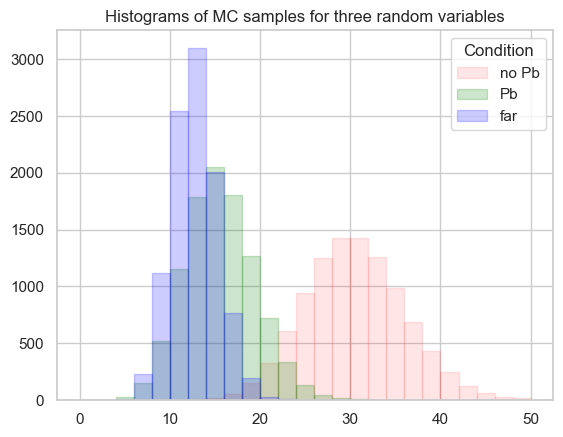

In [23]:
plt.hist(rv_noPb._mcpts, range = (0, 50), bins = 25, alpha = 0.1, facecolor = "red", edgecolor = "red", label = "no Pb")
plt.hist(rv_Pb._mcpts, range = (0, 50), bins = 25, alpha = 0.2, facecolor = "green", edgecolor = "green", label = "Pb")
plt.hist(rv_far._mcpts, range = (0, 50), bins = 25, alpha = 0.2, facecolor = "blue", edgecolor = "blue", label = "far")
plt.legend(title = "Condition")
plt.title("Histograms of MC samples for three random variables")

---
## Task 3

**Measurement with two positron sources**

1. After the instructor placed the second positron source into the skull model, measure the angular distribution of coincidence rate in the range of angles $\phi$ and $\psi$ needed to find the position of both sources. Accumulation time 20 s.
2. Use a ruler to fund approximate position of both positron sources.


We follow the same path: read data and make fits

In [24]:
data_3 = pd.read_table(data_dir + "/Task3.txt", sep = "\t")
data_3["err"] = np.sqrt(data_3["N"])
print(data_3.head())

   psi  phi   N       err
0    0  -35   6  2.449490
1    0  -30   6  2.449490
2    0  -25   7  2.645751
3    0  -20  25  5.000000
4    0  -15  97  9.848858


Fits are somewhat complicated, because we sometimes have a bimodal distribution but sometimes the two peaks may overlap and we only have just one peak.

In [25]:
def double_gauss_plus_background(x, bg, amp1, mean1, sig1, amp2, mean2, sig2):
    """
    Function returning a double gaussian with flat background, 
    Meaning of parameters is clear from the definition.
    """
    return bg + amp1 * np.exp(- 1/2 * ((x-mean1)/sig1)**2) + amp2 * np.exp(- 1/2 * ((x-mean2)/sig2)**2)

psi_vals = data_3["psi"].unique() # how many psi values were used
fits = dict.fromkeys(psi_vals)
for psi in psi_vals:
    data_psi = data_3[data_3["psi"] == psi]
    mid = np.sum(data_psi["phi"] * data_psi["N"]) / np.sum(data_psi["N"])
    top = max(data_psi["N"])
    bounds = ([0, 0,-np.inf, 0, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
    x_scale = (5, 200, 20, 7, 200, 20, 7)
    try:
        p_opt, p_cov = curve_fit(double_gauss_plus_background, data_psi["phi"].values, data_psi["N"].values, 
                    p0 = [5, 0.6*top, mid - 15, 7, 0.6 * top, mid + 15, 7], 
                    sigma = data_psi["err"].values, absolute_sigma = True, bounds = bounds, x_scale = x_scale)
    except (RuntimeError, ValueError, OptimizeWarning) as e:
        print(e)
        print("Reverting to single fit for psi = ", psi)
        p_opt, p_cov = curve_fit(gauss_plus_background, data_psi["phi"].values, data_psi["N"].values, 
                    p0 = [5, top, mid, 6], 
                    sigma = data_psi["err"].values, absolute_sigma = True)
    p_err = np.sqrt(np.diag(p_cov))
    errXerr = np.outer(p_err, p_err)
    p_corr = p_cov / errXerr
    if len(p_opt) == 4:
        p_opt = np.asarray([*p_opt, None, None, None])
        p_err = np.asarray([*p_err, None, None, None])
    fits[psi] = {"parameters": p_opt, "par_errors": p_err, "correlations" : p_corr}

# No units in the header, since the table would be too broad.
fits_table = pd.DataFrame({
    "$\\psi$ ($\\degree$)" : psi_vals,
    "bg" : [fits[psi]["parameters"][0] for psi in psi_vals],
    "$s_{bg}$" : [fits[psi]["par_errors"][0] for psi in psi_vals],
    "amp1" : [fits[psi]["parameters"][1] for psi in psi_vals],
    "$s_{a1}$" : [fits[psi]["par_errors"][1] for psi in psi_vals],
    "mean1" : [fits[psi]["parameters"][2] for psi in psi_vals],
    "$s_{m1}$" : [fits[psi]["par_errors"][2] for psi in psi_vals],
    "width1" : [fits[psi]["parameters"][3] for psi in psi_vals],
    "$s_{w1}$" : [fits[psi]["par_errors"][3] for psi in psi_vals],
    "amp2" : [fits[psi]["parameters"][4] for psi in psi_vals],
    "$s_{a2}$" : [fits[psi]["par_errors"][4] for psi in psi_vals],
    "mean2" : [fits[psi]["parameters"][5] for psi in psi_vals],
    "$s_{m2}$" : [fits[psi]["par_errors"][5] for psi in psi_vals],
    "width2" : [fits[psi]["parameters"][6] for psi in psi_vals],
    "$s_{w2}$" : [fits[psi]["par_errors"][6] for psi in psi_vals]
})
fits_table.style.format(precision = 2).set_caption("Parameters of fits to angular profiles of coincidence rates")

,$\psi$ ($\degree$),bg,$s_{bg}$,amp1,$s_{a1}$,mean1,$s_{m1}$,width1,$s_{w1}$,amp2,$s_{a2}$,mean2,$s_{m2}$,width2,$s_{w2}$
0,0,4.82,1.61,140.70,8.51,-7.52,0.36,6.62,0.34,201.79,10.10,23.49,0.29,6.64,0.25
1,90,5.61,0.84,183.66,230.16,-10.30,5.45,5.06,1.50,212.36,215.28,-2.67,5.19,5.21,1.49
2,120,4.86,1.12,178.33,25.36,-16.14,1.84,7.33,0.85,129.15,25.95,-0.50,2.46,7.40,1.13


In [26]:
def add_fitted_to_data(data):
    '''
    Adds fitted values and residuals to data points.
    Also adds chi2 and df to the fits dictionary.
    '''
    result = data.copy()
    psi = np.mean(result["psi"])
    parameters = fits[psi]["parameters"]
    result["N_fit"] = double_gauss_plus_background(data["phi"], *parameters)
    result["residual"] = (result["N"] - result["N_fit"]) / np.sqrt(result["N_fit"])
    fits[psi]["chisq"] = sum(r**2 for r in result["residual"]) # side effect !
    nrow, ncol = data.shape
    fits[psi]["df"] = nrow - len(parameters)
    return result

data_3 = data_3.groupby("psi")[["psi", "phi", "N", "err"]].apply(add_fitted_to_data)
data_3.index = data_3.index.droplevel("psi")
print(data_3.head())

   psi  phi   N       err      N_fit  residual
0    0  -35   6  2.449490   4.847272  0.523574
1    0  -30   6  2.449490   5.265384  0.320144
2    0  -25   7  2.645751   9.148228 -0.710251
3    0  -20  25  5.000000  28.675811 -0.686429
4    0  -15  97  9.848858  79.205317  1.999462


Text(0.5, 1.0, 'Gaussian fits to angular profiles of coincidence rates')

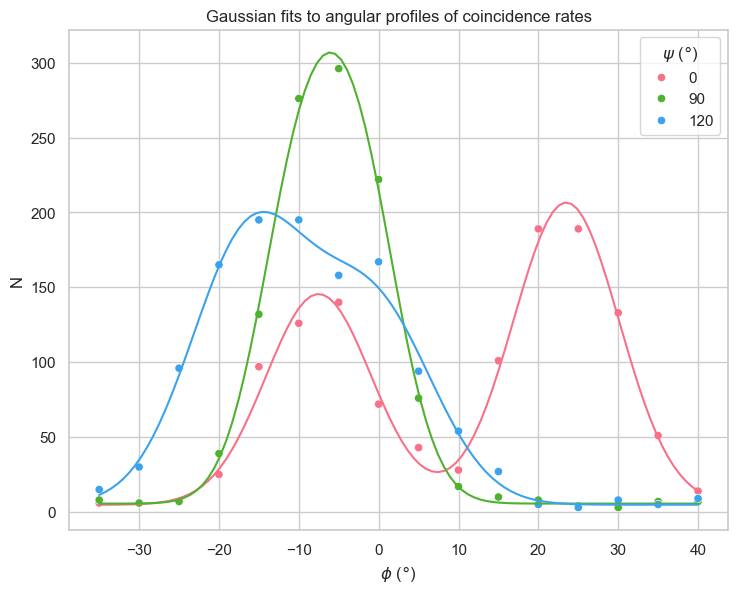

In [27]:
def make_fine_plot(data):
    '''
    Data to draw a fitted function plot
    '''
    psi = np.mean(data["psi"]).astype(int)
    parameters = fits[psi]["parameters"]
    x = np.linspace(min(data["phi"]), max(data["phi"]), 100)
    y = double_gauss_plus_background(x, *parameters)
    return pd.DataFrame({"psi": np.repeat(psi, 100), "phi": x, "N_fit": y})

fine_data = data_3.groupby("psi")[["psi", "phi", "N_fit"]].apply(make_fine_plot)

fig, ax = plt.subplots(figsize=(8.5, 6.5))
sns.scatterplot(data = data_3, x = "phi", y = "N", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
sns.lineplot(data = fine_data, x = "phi", y = "N_fit", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax, legend = False)
plt.xlabel("$\\phi$ ($\\degree$)")
plt.legend(title = "$\\psi$ ($\\degree$)")
plt.title("Gaussian fits to angular profiles of coincidence rates")

### Diagnostic plots

We have a table of fits and plot of data and fit, but we also need to see if our fit was good. Therefore we add two more diagnostic plots - normalized residuals and QQ-plot.

Text(0.5, 1.0, 'Residuals of gaussian fits to angular profiles')

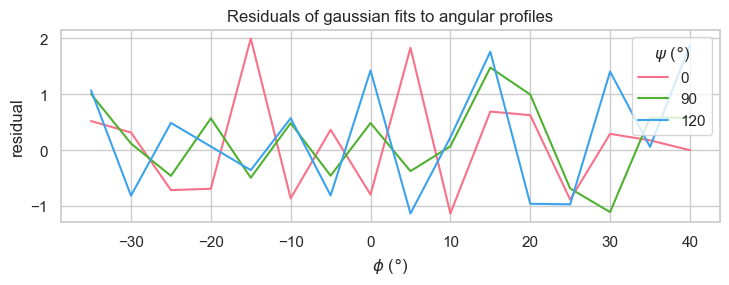

In [28]:
fig, ax = plt.subplots(figsize = [8.5, 2.5])
sns.lineplot(data = data_3, x = "phi", y = "residual", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), dashes = True, ax = ax)
plt.xlabel("$\\phi$ ($\\degree$)")
plt.legend(title = "$\\psi$ ($\\degree$)")
plt.title("Residuals of gaussian fits to angular profiles")

Text(0.5, 1.0, 'QQ plot for gaussian fits to angular profiles')

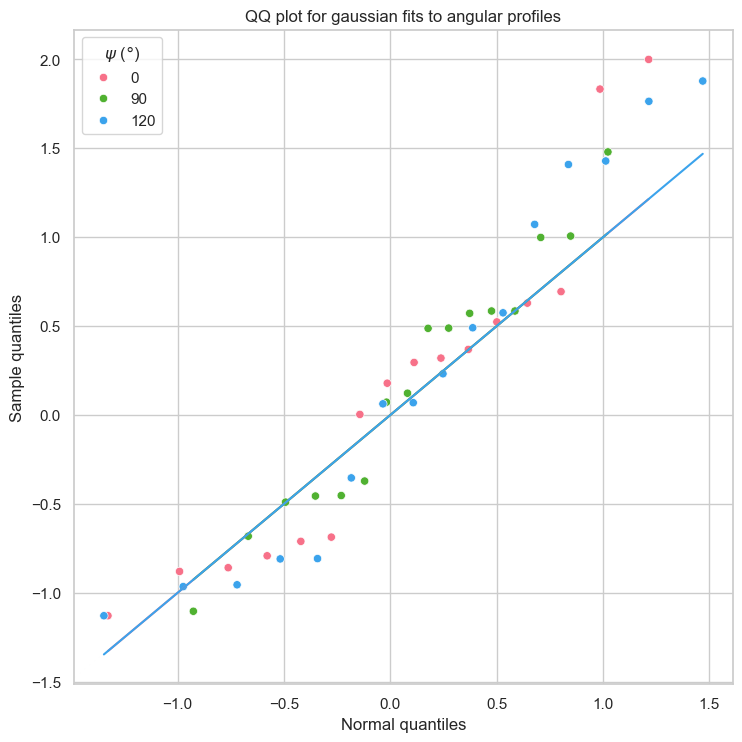

In [29]:
def make_QQ_data(data):
    psi = np.mean(data["psi"]).astype(int)
    y = np.sort(data["residual"])
    mean, std = np.mean(y), np.std(y)
    ppf = norm(loc=mean, scale=std).ppf # Inverse CDF
    N = len(y)
    x = [ppf(i / (N+2)) for i in range(1,N+1)]
    nrow, ncol = data.shape
    return pd.DataFrame({"psi": np.repeat(psi, nrow), "x": x, "y": y})

qq_data = data_3.groupby("psi")[["psi", "residual"]].apply(make_QQ_data)
   
fig, ax = plt.subplots(figsize = [8.5, 8.5])
sns.scatterplot(data = qq_data, x = "x", y = "y", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
sns.lineplot(data = qq_data, x = "x", y = "x", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax, legend = False)

# Add labels
plt.xlabel('Normal quantiles')
plt.ylabel('Sample quantiles')
plt.legend(title = "$\\psi$ ($\\degree$)")
plt.title("QQ plot for gaussian fits to angular profiles")

### Calculate the positions of positron sources

We start by converting fit parameters to (correlated) `mcerp` random variables. With these we then do all the calculations so that we keep track of uncertainties along the way. We construct lines and their crossings, and make tables and plots as a guide to what are the results and as a material to include in a lab report. 

*Note*: Below, the two positions of detector B corresponding to two gaussian peaks are denoted as B and C.

In [30]:
rv_fits = {} # contains line points as random variables
par_names = ["bg", "amp1", "mean1", "std1", "amp2", "mean2", "std2"]
for psi, fit in fits.items():
    rv_list = []
    for par, err in zip(fit["parameters"], fit["par_errors"]):
        rv_list.append(Normal(par, err))
    correlate(rv_list, fit["correlations"])
    rv_fits[psi] = {par_names[i]: rv_list[i] for i in range(len(rv_list))}


In [31]:
points = {} # to collect random vaariables
records = [] # to collect data for a table

for psi, par in rv_fits.items():
    # Order here is CAB or AB, depending on whether we have two peaks or one
    # Simplifies line plotting. 
    try:
        ax, ay, cx, cy = to_xy(R, psi, par["mean2"])
        records.append({
            "$\\psi$ ($\\degree$)" : psi,
            "ABC" : "C",
            "x (cm)" : cx.mean,
            "$s_x$ (cm)" : cx.std,
            "y (cm)" : cy.mean,
            "$s_y$ (cm)" : cy.std
        })
        points[psi] = {"C": (cx, cy)}
        C_str = f"C: x={cx.mean:.2f}+/-{cx.std:.2f}, y={cy.mean:.2f}+/-{cy.std:.2f}"
    except KeyError:
        points[psi] = {}  
        C_str = ""
    ax, ay, bx, by = to_xy(R, psi, par["mean1"])
    records.append({
            "$\\psi$ ($\\degree$)" : psi,
            "ABC" : "A",
            "x (cm)" : ax.mean,
            "$s_x$ (cm)" : ax.std,
            "y (cm)" : ay.mean,
            "$s_y$ (cm)" : ay.std
        })
    records.append({
            "$\\psi$ ($\\degree$)" : psi,
            "ABC" : "B",
            "x (cm)" : bx.mean,
            "$s_x$ (cm)" : bx.std,
            "y (cm)" : by.mean,
            "$s_y$ (cm)" : by.std
        })
    points[psi].update({"A": (ax, ay), "B": (bx, by)})
    
points_table = pd.DataFrame.from_records(records)
points_table.sort_values(by = ["$\\psi$ ($\\degree$)", "ABC"])\
    .style.format(precision = 2)\
    .set_caption("Estimated positions of detectors A and B/C")

,$\psi$ ($\degree$),ABC,x (cm),$s_x$ (cm),y (cm),$s_y$ (cm)
1,0,A,-15.00,0.50,0.00,0.00
2,0,B,14.87,0.50,-1.96,0.11
0,0,C,13.76,0.46,5.98,0.21
4,90,A,-0.00,0.00,-15.00,0.50
5,90,B,2.67,1.40,14.69,0.56
3,90,C,0.70,1.36,14.92,0.51
7,120,A,7.50,0.25,-12.99,0.43
8,120,B,-3.59,0.48,14.56,0.50
6,120,C,-7.38,0.61,13.04,0.54


In [32]:
# lines connecting AB and AC for each psi
lines = {}
for psi in psi_vals:
    ax1, ay1 = points[psi]["A"]
    bx1, by1 = points[psi]["B"]
    a = by1 - ay1
    b = - bx1 + ax1
    c = a * ax1 + b * ay1
    lines[psi] = {"AB" : (a, b, c)}
    try:
        cx1, cy1 = points[psi]["C"]
    except KeyError:
        continue
    aa = cy1 - ay1
    bb = - cx1 + ax1
    cc = aa * ax1 + bb * ay1
    lines[psi]["AC"] = (aa, bb, cc)

# X-points of pairs of lines: size-2 combinations of all psi measurements
from itertools import product
rows = []
X_points = []
for psi1, psi2 in combinations(psi_vals, 2):
    for bc1, bc2 in product("BC", repeat=2):
        try: # some 2G fits may have failed
            ax1, ay1 = points[psi1]["A"]
            bx1, by1 = points[psi1][bc1]
            ax2, ay2 = points[psi2]["A"]
            bx2, by2 = points[psi2][bc2]
        except KeyError:
            continue
        a = by1 - ay1
        b = - bx1 + ax1
        c = a * ax1 + b * ay1
        d = by2 - ay2
        e = - bx2 + ax2
        f = d * ax2 + e * ay2
        Det = e * a - b * d
        x = (c * e - b * f) / Det
        y = (a * f - c * d) / Det
        rho = correlation_matrix([x,y])[0,1]
        rows.append({
            "$\\psi_1$ ($\\degree$)": psi1, 
            "BC1": bc1, 
            "$\\psi_2$ ($\\degree$)": psi2, 
            "BC2": bc2, 
            "x (cm)" : x.mean, 
            "$s_x$ (cm)" : x.std,
            "y (cm)" : y.mean, 
            "$s_y$ (cm)" : y.std,
            "$\\rho$" : rho
        })
        X_points.append((x, y))

X_table = pd.DataFrame.from_records(rows)
X_table.style.format(precision = 2).set_caption("Estimated crossing of lines through detectors")

,$\psi_1$ ($\degree$),BC1,$\psi_2$ ($\degree$),BC2,x (cm),$s_x$ (cm),y (cm),$s_y$ (cm),$\rho$
0,0,B,90,B,1.26,0.67,-1.07,0.08,-0.60
1,0,B,90,C,0.33,0.64,-1.01,0.07,-0.59
2,0,C,90,B,1.68,0.91,3.47,0.23,0.87
3,0,C,90,C,0.43,0.83,3.21,0.21,0.84
4,0,B,120,B,2.74,0.25,-1.17,0.07,-0.48
5,0,B,120,C,0.66,0.36,-1.03,0.07,-0.46
6,0,C,120,B,0.93,0.28,3.31,0.13,0.52
7,0,C,120,C,-1.53,0.41,2.80,0.13,0.54
8,90,B,120,B,1.46,0.69,2.04,1.81,-0.92
9,90,B,120,C,1.14,0.56,-1.85,1.09,-0.86


We can now draw the skull and plot the lines connecting detectors A and B and their crossing.

Text(0.5, 1.0, 'Lines through detectors A and B/C and their crossing point')

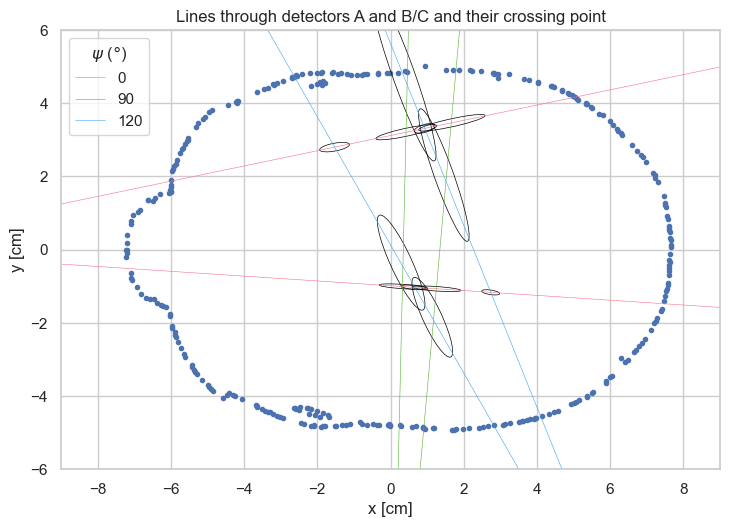

In [33]:
fig, ax = plt.subplots(figsize = [8.5, 8.5])
sns.lineplot(data = points_table, x = "x (cm)", y = "y (cm)", hue = "$\\psi$ ($\\degree$)", 
             sort = False, palette = sns.color_palette("husl", len(psi_vals)),
            linewidth = 0.4)
ax.scatter(skull_data["x"], skull_data["y"], marker = ".")
cmap = mpl.colormaps["berlin"]
colors = cmap(np.linspace(0, 1, len(X_points)))
for xy, color in zip(X_points, colors):
    x, y = xy
    confidence_ellipse(x, y, ax, n_std = 1, edgecolor = "black", linewidth = 0.5)
ax.set_aspect("equal")
plt.xlabel("x [cm]")
plt.xlim([-9, 9])
plt.ylabel("y [cm]")
plt.ylim([-6,6])
plt.legend(title = "$\\psi$ ($\\degree$)")
plt.title("Lines through detectors A and B/C and their crossing point")

Most likely we won't see exact three-way crossings, but the picture will give strong indiccation where they are: watch for accumulations of overlapping elipses and consult the table. 